# Data Assignment 1 - `t54zheng` (20939203)



In [87]:
import pandas as pd
import scipy.stats as stats
from math import sqrt
import warnings
import matplotlib.pyplot as plt
from datetime import timedelta

warnings.filterwarnings('ignore')

In [9]:
# Import raw data
data_file = "djreturns.xlsx"

dj27 = pd.read_excel(data_file, sheet_name="dj27")
individual_dj27_returns = pd.read_excel(data_file, sheet_name="returns")
sp500_returns = pd.read_excel(data_file, sheet_name="sp500")

## Task 2 - *Basic Statistics*

For each of the 27 stocks in `dj27`, and the market return `sp500_returns`, we want to find these statistics on their returns:
- The arithmetic mean
- standard deviation
- skewness
- kurtosis

In [10]:
# Let's see what our data looks like
dj27.head()

,PERMNO,COMNAM,TICKER
0,10107,MICROSOFT CORP,MSFT
1,10145,HONEYWELL INTERNATIONAL INC,HON
2,11308,COCA COLA CO,KO
3,12490,INTERNATIONAL BUSINESS MACHS COR,IBM
4,14008,AMGEN INC,AMGN


In [11]:
individual_dj27_returns.head()

,PERMNO,DATE,COMNAM,TICKER,PRC,RET,SHROUT
0,10107,2000-01-31,MICROSOFT CORP,MSFT,97.8750,-0.161670,5160025
1,10107,2000-02-29,MICROSOFT CORP,MSFT,89.3750,-0.086845,5160025
2,10107,2000-03-31,MICROSOFT CORP,MSFT,106.2500,0.188811,5242000
3,10107,2000-04-28,MICROSOFT CORP,MSFT,69.7500,-0.343529,5262405
4,10107,2000-05-31,MICROSOFT CORP,MSFT,62.5625,-0.103047,5262405


In [12]:
# We need to group the data in individual_dj27_returns based on stock.
# Note that using PERMNO is a better idea since COMNAM can change.

# Let's show that our data actually has this issue:
duplicate_comnam_df = individual_dj27_returns[["PERMNO", "COMNAM"]].drop_duplicates().groupby("PERMNO").agg({'COMNAM': lambda x: list(x)})
duplicate_comnam_df

,COMNAM
PERMNO,
10107,[MICROSOFT CORP]
10145,[HONEYWELL INTERNATIONAL INC]
11308,[COCA COLA CO]
12490,[INTERNATIONAL BUSINESS MACHS COR]
14008,[AMGEN INC]
14541,"[CHEVRON CORP, CHEVRONTEXACO CORP, CHEVRON COR..."
14593,"[APPLE COMPUTER INC, APPLE INC]"
18163,[PROCTER & GAMBLE CO]
18542,[CATERPILLAR INC]


We see many securities have multiple comnames as they have changed their company name over the period of the data, but PERMNO remains the same.

In [13]:
# So let's make a new dataframe for each PERMNO we have in dj27, and store them in a dict by PERMNO.
returns_dict = {} # permno -> dataframe(permno_returns)
permnos = dj27["PERMNO"]
for permno in permnos:
    returns_df = individual_dj27_returns[individual_dj27_returns["PERMNO"] == permno]
    returns_dict[permno] = returns_df

In [14]:
# Now that we have our data nicely organized, let's make a new dataframe to present our statistics
# We'll have every row describes the statistics for each return

stats_df = pd.DataFrame(columns=["permno", "Common Name(s)", "Mean (%)", "Standard Deviation (%)", "Skewness", "Kurtosis"])

# add using .loc[-1]
# First add the stats for the market portfolio
market_stats = {
    "permno": "market",
    "Common Name(s)": ["Market"], 
    "Mean (%)": sp500_returns["SPRTRN"].mean(),
    "Standard Deviation (%)": sp500_returns["SPRTRN"].std(),
    "Skewness": stats.skew(sp500_returns["SPRTRN"]),
    "Kurtosis": stats.kurtosis(sp500_returns["SPRTRN"])
    }

# stats_df = stats_df.append(market_stats, ignore_index=True)
stats_df.loc[0] = [v for v in market_stats.values()]

# Now we'll add the rest of the securities from dj27
duplicate_comnam_dict = duplicate_comnam_df.to_dict()['COMNAM']

i = 1
for permno, df in returns_dict.items():
    permno_stats = {
        "permno": permno,
        "Common Name(s)": duplicate_comnam_dict[permno], 
        "Mean (%)": df["RET"].mean(),
        "Standard Deviation (%)": df["RET"].std(),
        "Skewness": stats.skew(df["RET"]),
        "Kurtosis": stats.kurtosis(df["RET"])
    }
    # stats_df = stats_df.append(permno_stats, ignore_index=True)
    stats_df.loc[i] = [v for v in permno_stats.values()]
    i += 1

# Now we need to annualize the mean and standard deviation of the returns (currently monthly)
stats_df["Mean (%)"] = (1 + stats_df["Mean (%)"]) ** 12 - 1
stats_df["Standard Deviation (%)"] = stats_df["Mean (%)"] * sqrt(12) # Annualizing stdev

# Format the results
stats_df["Mean (%)"] *= 100
stats_df["Standard Deviation (%)"] *= 100

# Round to 4 decimal places
stats_df = stats_df.round(4)
stats_df

,permno,Common Name(s),Mean (%),Standard Deviation (%),Skewness,Kurtosis
0,market,[Market],6.6994,23.2074,-0.5312,1.0848
1,10107,[MICROSOFT CORP],15.0657,52.1892,0.2160,3.3232
2,10145,[HONEYWELL INTERNATIONAL INC],13.3002,46.0731,-0.1321,7.7921
3,11308,[COCA COLA CO],7.7935,26.9976,-0.5014,1.1777
4,12490,[INTERNATIONAL BUSINESS MACHS COR],6.7402,23.3487,0.4121,3.5562
5,14008,[AMGEN INC],10.8301,37.5167,0.5216,1.8024
6,14541,"[CHEVRON CORP, CHEVRONTEXACO CORP, CHEVRON COR...",11.2896,39.1084,0.4071,2.2700
7,14593,"[APPLE COMPUTER INC, APPLE INC]",38.8050,134.4243,-0.6328,3.4377
8,18163,[PROCTER & GAMBLE CO],9.7256,33.6905,-1.5059,9.1691
9,18542,[CATERPILLAR INC],18.7792,65.0532,-0.0672,1.9528


In [15]:
# The market portfolio
stats_df[stats_df["permno"] == "market"]

,permno,Common Name(s),Mean (%),Standard Deviation (%),Skewness,Kurtosis
0,market,[Market],6.6994,23.2074,-0.5312,1.0848


### Statistics of the market portfolio

- TODO: Comment on skewness and kurtosis of the market return vs a normal dist

In [16]:
## Task 3 - Equal-weighted Portfolio

individual_dj27_returns

,PERMNO,DATE,COMNAM,TICKER,PRC,RET,SHROUT
0,10107,2000-01-31,MICROSOFT CORP,MSFT,97.875000,-0.161670,5160025
1,10107,2000-02-29,MICROSOFT CORP,MSFT,89.375000,-0.086845,5160025
2,10107,2000-03-31,MICROSOFT CORP,MSFT,106.250000,0.188811,5242000
3,10107,2000-04-28,MICROSOFT CORP,MSFT,69.750000,-0.343529,5262405
4,10107,2000-05-31,MICROSOFT CORP,MSFT,62.562500,-0.103047,5262405
...,...,...,...,...,...,...,...
7123,92655,2021-08-31,UNITEDHEALTH GROUP INC,UNH,416.269989,0.009825,942917
7124,92655,2021-09-30,UNITEDHEALTH GROUP INC,UNH,390.739990,-0.057847,942917
7125,92655,2021-10-29,UNITEDHEALTH GROUP INC,UNH,460.470001,0.178456,942917
7126,92655,2021-11-30,UNITEDHEALTH GROUP INC,UNH,444.220001,-0.035290,941851


To make our equally-weighted index we will allocate each ticker an equal weight of $\dfrac{1}{n}$, and since we have 27 stocks, we allocate each stock a weight of $\dfrac{1}{27}$.

In [17]:
# We only need to use monthly returns (already calculated) to calculate the index. So let's align the data.
# This df will hold our (unindexed [to 1000]) portfolio

# We'll just pull the dates from the sp500 returns since that, and the dj data all have aligned dates
portfolio_df = pd.DataFrame(sp500_returns["DATE"])

for permno, df in returns_dict.items():
    portfolio_df.loc[:, permno] = list(df["RET"])

# Just to validate, none of our cells are null so we can safely continue 
portfolio_df.isnull().sum().sum() # returns number of null cells

0

In [18]:
num_stocks = 27
weight = 1 / num_stocks
starting_level = 1000

portfolio_df.iloc[:, 1:] *= weight # Weighted average of portfolio returns
portfolio_df.loc[:, "Weighted Return"] = portfolio_df.iloc[:, 1:].sum(axis=1)

In [33]:
# Now we'll use this data to populate our index_df 
index_returns_df = portfolio_df[["DATE", "Weighted Return"]]

index_df = pd.DataFrame(columns = ["Date", "Index Level"])
index_df.loc[0] = ["1999-12-31", 1000.00]

for index, row in index_returns_df.iterrows():
    index_df.loc[index + 1, "Date"] = str(index_returns_df.loc[index, "DATE"])
    index_df.loc[index + 1, "Index Level"] = (1+ index_returns_df.loc[index, "Weighted Return"]) * index_df.loc[index, "Index Level"]
index_df["Date"] = pd.to_datetime(index_df["Date"], format='mixed') # Fix datetime

index_df

,Date,Index Level
0,1999-12-31,1000.000000
1,2000-01-31,981.118757
2,2000-02-29,899.214402
3,2000-03-31,1006.579485
4,2000-04-28,993.307897
...,...,...
260,2021-08-31,11319.801843
261,2021-09-30,10845.419378
262,2021-10-29,11373.659500
263,2021-11-30,10961.178781


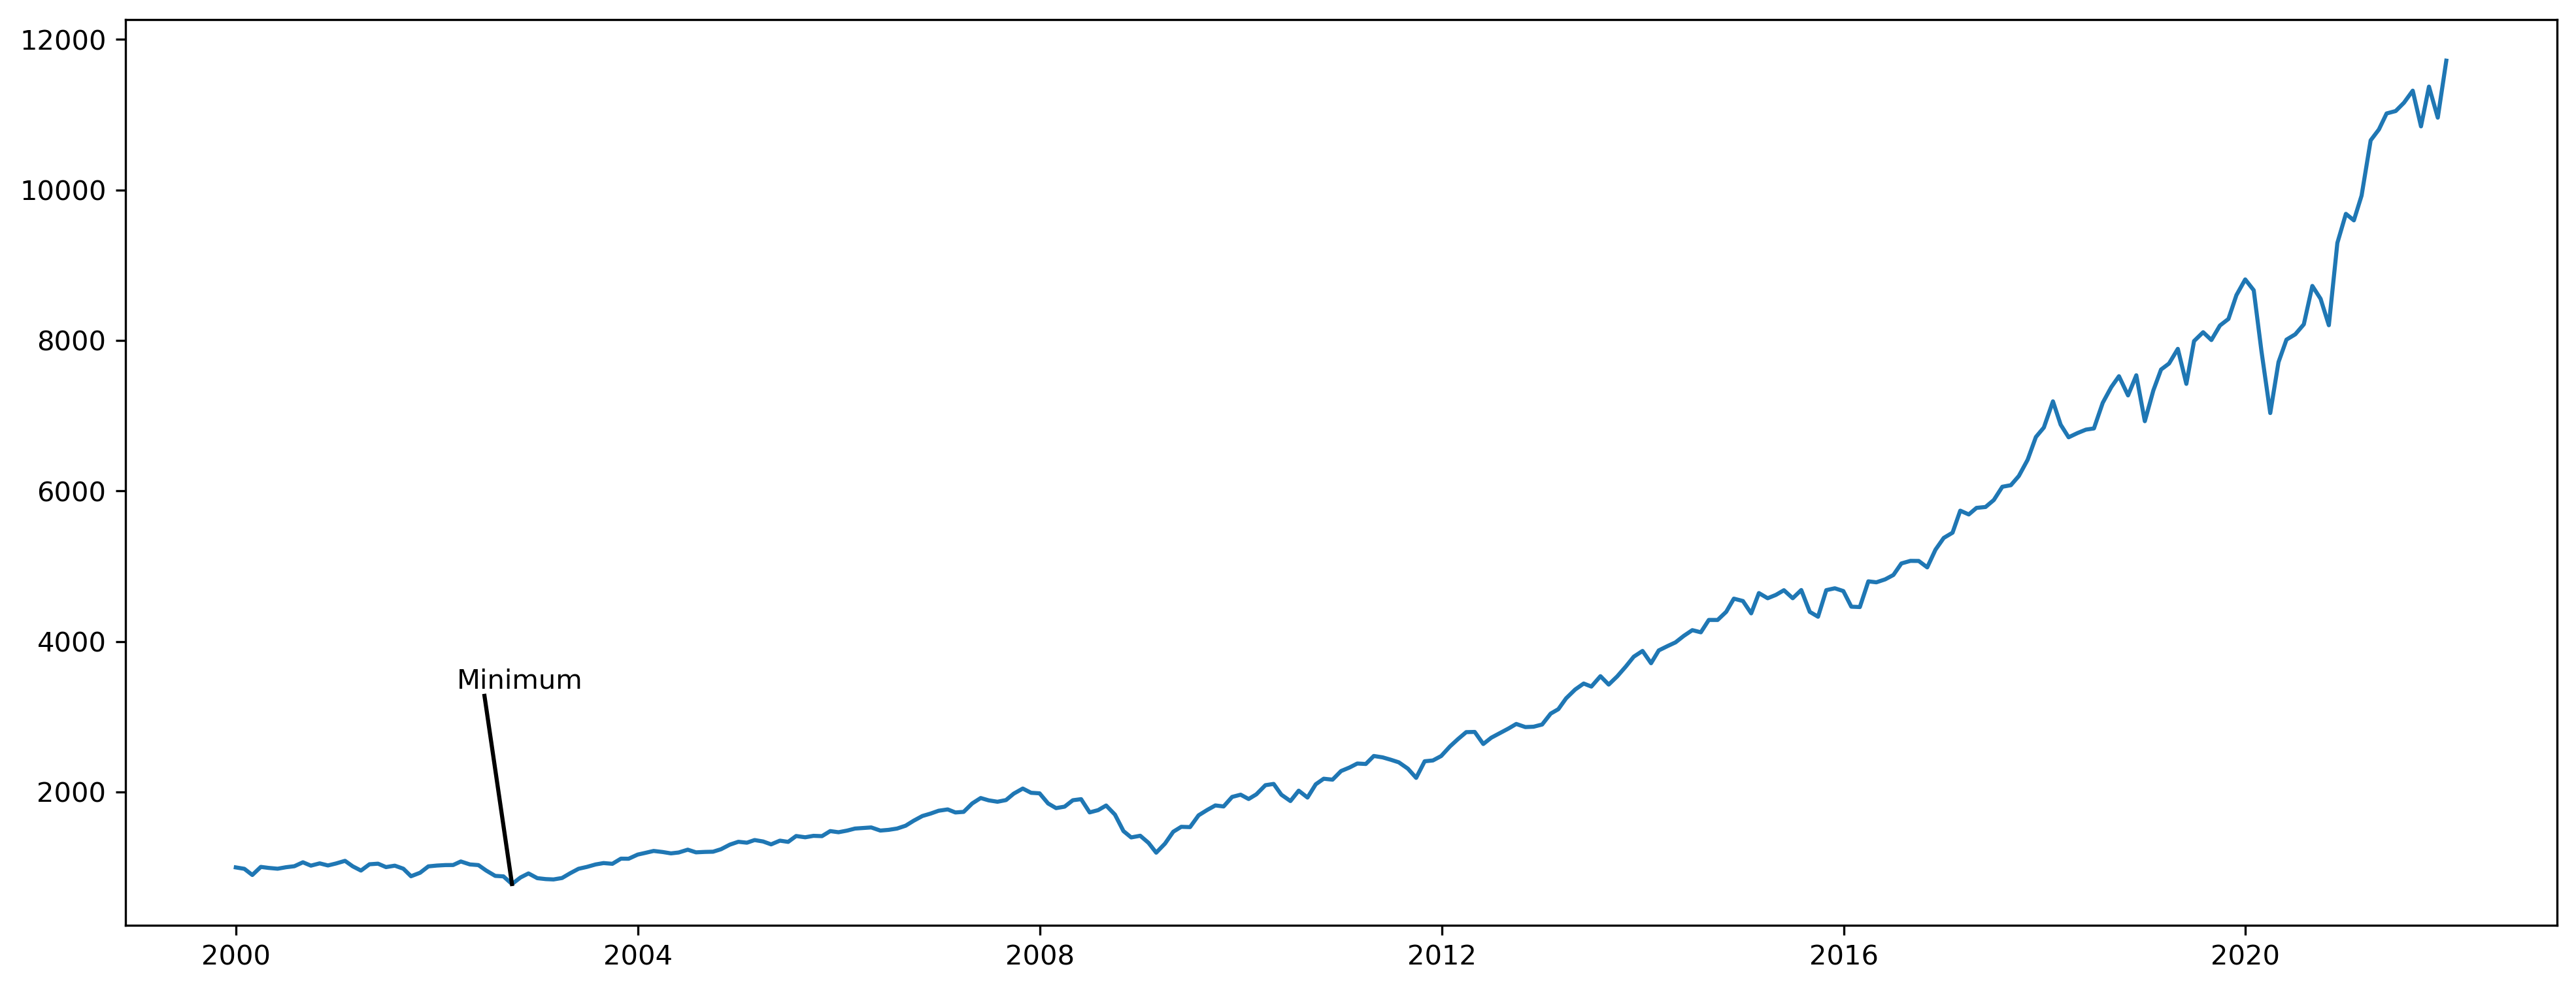

In [110]:
index_df.set_index(["Date"])

plt.figure(figsize=(16, 6), dpi=300)

plt.plot(index_df["Date"], index_df["Index Level"], label="Price-Weighted Index")

# We need to find (and annotate the min and max)

# Min
min_y = min(index_df["Index Level"])
min_x = index_df[index_df["Index Level"] == min_y]["Date"]

plt.plot([min_x, min_x - timedelta(100)], [min_y, min_y + 2500], linestyle="-", color="black")
plt.text(min_x - timedelta(200), min_y + 2600, "Minimum")
plt.show()

In [35]:
index_df[index_df["Index Level"] == min_y]

,Date,Index Level
33,2002-09-30,778.991112


In [30]:
# How to add row to df??

index_df = pd.DataFrame(columns = ["Date", "Index Level"])
index_df.loc[0] = ["1999-12-31", 1000.00] # (pd.DataFrame.from_dict({"Date": "1999-12-31", "Index Level": 1000.00}, orient="index"))
index_df

,Date,Index Level
0,1999-12-31,1000.0
